In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import plotly.plotly as py
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 999)
pd.set_option('display.max_rows', 999)
hfi_df = pd.read_csv('hfi_cc_2018.csv')
hfi_df.head()

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_missing,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,pf_association_sport_operate,pf_association_sport,pf_association,pf_expression_killed,pf_expression_jailed,pf_expression_influence,pf_expression_control,pf_expression_cable,pf_expression_newspapers,pf_expression_internet,pf_expression,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,pf_score,pf_rank,ef_government_consumption,ef_government_transfers,ef_government_enterprises,ef_government_tax_income,ef_government_tax_payroll,ef_government_tax,ef_government,ef_legal_judicial,ef_legal_courts,ef_legal_protection,ef_legal_military,ef_legal_integrity,ef_legal_enforcement,ef_legal_restrictions,ef_legal_police,ef_legal_crime,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,10.00000,10.0,10.000000,10.000000,10.000000,10.0,7.5,5.0,5.0,5.0,7.500000,8.806810,5.0,10.0,5.0,6.666667,NaN,NaN,10.0,9.566667,8.011111,9.192593,10.0,10.0,NaN,NaN,10.0,NaN,NaN,10.0,NaN,NaN,10.0,10.0,10.0,10.0,5.000000,5.25,10.0,10.0,10.0,8.607143,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.596281,57.0,8.232353,7.509902,8.0,9.0,7.0,8.0,7.935564,2.668222,3.145462,4.512228,8.333333,4.166667,4.387444,6.485287,6.933500,6.215401,0.948718,5.071814,8.986454,9.484575,9.74360,10.0,9.553657,9.626667,9.24,8.0240,8.963556,5.574481,9.405328,7.489905,10.00000,6.306106,4.615385,8.296923,6.406138,8.214900,5.0,7.295687,9.0,7.098562,5.566667,5.396399,6.234861,8.0,6.299741,10.0,6.916278,6.072172,6.000000,9.713864,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,9.29403,5.0,9.926119,9.990149,8.842060,10.0,7.5,0.0,0.0,0.0,5.833333,8.043882,5.0,5.0,5.0,5.000000,NaN,NaN,5.0,6.873333,2.961111,4.944815,5.0,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,5.0,5.0,10.0,10.0,2.666667,4.00,10.0,7.5,7.5,7.380952,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,5.281772,147.0,2.150000,7.817129,0.0,7.0,2.0,4.5,3.616782,4.186704,4.327113,4.689952,4.166667,5.000000,4.507538,6.626692,6.136845,6.737383,0.820513,4.690743,6.955962,8.339152,8.72046,5.0,7.

In [3]:
hfi_df.isna().sum()

year                                     0
ISO_code                                 0
countries                                0
region                                   0
pf_rol_procedural                      578
pf_rol_civil                           578
pf_rol_criminal                        578
pf_rol                                  80
pf_ss_homicide                          80
pf_ss_disappearances_disap              89
pf_ss_disappearances_violent            80
pf_ss_disappearances_organized         179
pf_ss_disappearances_fatalities         80
pf_ss_disappearances_injuries           80
pf_ss_disappearances                    80
pf_ss_women_fgm                        172
pf_ss_women_missing                    120
pf_ss_women_inheritance_widows         541
pf_ss_women_inheritance_daughters      541
pf_ss_women_inheritance                119
pf_ss_women                            100
pf_ss                                   80
pf_movement_domestic                    98
pf_movement

In [4]:
hfi_df = hfi_df.dropna(how='any', subset=['pf_rank', 'ef_rank'])
hfi_df.isna().sum()

year                                     0
ISO_code                                 0
countries                                0
region                                   0
pf_rol_procedural                      498
pf_rol_civil                           498
pf_rol_criminal                        498
pf_rol                                   0
pf_ss_homicide                           0
pf_ss_disappearances_disap               9
pf_ss_disappearances_violent             0
pf_ss_disappearances_organized          99
pf_ss_disappearances_fatalities          0
pf_ss_disappearances_injuries            0
pf_ss_disappearances                     0
pf_ss_women_fgm                         92
pf_ss_women_missing                     40
pf_ss_women_inheritance_widows         461
pf_ss_women_inheritance_daughters      461
pf_ss_women_inheritance                 39
pf_ss_women                             20
pf_ss                                    0
pf_movement_domestic                    18
pf_movement

In [5]:
pf_cols = list(hfi_df.columns[4:61])
ef_cols = list(hfi_df.columns[64:-6])
pf_mean = hfi_df['pf_rank'].mean()
ef_mean = hfi_df['ef_rank'].mean()

hfi_df['pf_pct_off_mean']  = hfi_df['pf_rank'] / pf_mean
hfi_df['ef_pct_off_mean']  = hfi_df['ef_rank'] / ef_mean

In [6]:
#I'm trying to fill NaN values with their rank relative to the mean rank times the mean value in each column where there is a NaN
hfi_df[pf_cols].fillna(hfi_df.mean()*hfi_df['pf_pct_off_mean'], inplace=True)
hfi_df[ef_cols].fillna(hfi_df.mean()*hfi_df['ef_pct_off_mean'], inplace=True)
hfi_df.isna().sum()

C:\Users\Jeff\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning:

'<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects

C:\Users\Jeff\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



year                                     0
ISO_code                                 0
countries                                0
region                                   0
pf_rol_procedural                      498
pf_rol_civil                           498
pf_rol_criminal                        498
pf_rol                                   0
pf_ss_homicide                           0
pf_ss_disappearances_disap               9
pf_ss_disappearances_violent             0
pf_ss_disappearances_organized          99
pf_ss_disappearances_fatalities          0
pf_ss_disappearances_injuries            0
pf_ss_disappearances                     0
pf_ss_women_fgm                         92
pf_ss_women_missing                     40
pf_ss_women_inheritance_widows         461
pf_ss_women_inheritance_daughters      461
pf_ss_women_inheritance                 39
pf_ss_women                             20
pf_ss                                    0
pf_movement_domestic                    18
pf_movement

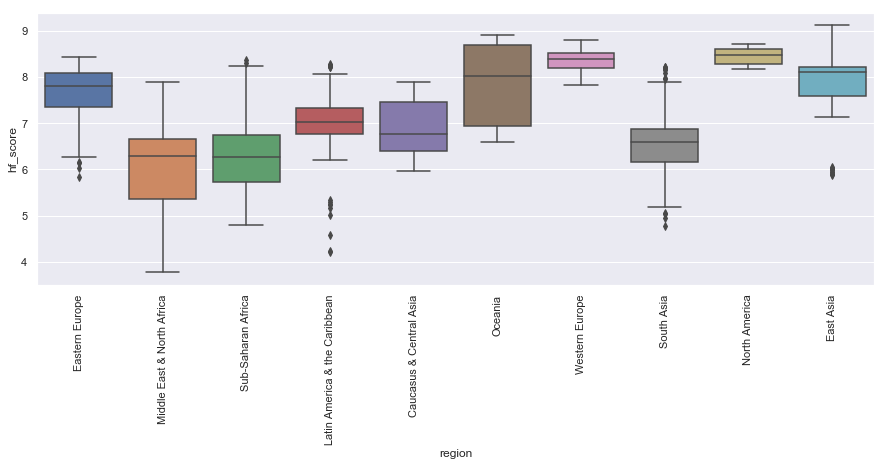

In [7]:
sns.set()
plt.figure(figsize=(15,5))
ax = sns.boxplot(hfi_df['region'], hfi_df['hf_score'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [8]:
from sklearn import preprocessing

In [ ]:
import plotly
plotly.tools.set_credentials_file(username='username', api_key='key')

In [ ]:
#code adapted from plotly choropleth world map example
x = hfi_df.iloc[:, 4:].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
hfi_df.iloc[:, 4:] = pandas.DataFrame(x_scaled)

data = [ dict(
        type = 'choropleth',
        locations = hfi_df['ISO_code'],
        z = hfi_df['hf_score'],
        text = hfi_df['countries'],
        #colorscale = [[1,"rgb(5, 10, 172)"],[3,"rgb(40, 60, 190)"],[5,"rgb(70, 100, 245)"],\
            #[7,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[10,"rgb(220, 220, 220)"]],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = True,
            #tickprefix = '$',
            title = 'Human Freedom Score'),
      ) ]

layout = dict(
    title = '2018 Human Freedom Index by Country',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='hfiscore-world-map' )